In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
import os
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('student_performance.csv')

In [4]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19,64,Low,Medium,No,8,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24,98,Medium,Medium,Yes,7,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29,89,Low,Medium,Yes,8,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,19,92,Medium,Medium,Yes,6,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76.0,Medium,Yes,1.0,High,Medium,Public,Positive,2.0,No,High School,Near,Female,68.0
6603,23,76,High,Medium,No,8,81.0,Medium,Yes,3.0,Low,High,Public,Positive,2.0,No,High School,Near,Female,69.0
6604,20,90,Medium,Low,Yes,6,65.0,Low,Yes,3.0,Low,Medium,Public,Negative,2.0,No,Postgraduate,Near,Female,68.0
6605,10,86,High,High,Yes,6,91.0,High,Yes,2.0,Low,Medium,Private,Positive,3.0,NaN,High School,Far,Female,68.0


In [ ]:
# description of dataset

In [5]:
df.shape

(6607, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   object 
 3   Access_to_Resources         6606 non-null   object 
 4   Extracurricular_Activities  6607 non-null   object 
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6606 non-null   float64
 7   Motivation_Level            6607 non-null   object 
 8   Internet_Access             6606 non-null   object 
 9   Tutoring_Sessions           6605 non-null   float64
 10  Family_Income               6607 non-null   object 
 11  Teacher_Quality             6527 non-null   object 
 12  School_Type                 6604 non-null   object 
 13  Peer_Influence              6603 

In [7]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6606.000000,6605.000000,6605.000000,6606.000000
mean,19.975329,79.977448,7.02906,75.070996,1.493414,2.967449,67.235695
std,5.990594,11.547475,1.46812,14.400825,1.230601,1.031015,3.890749
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [8]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19,64,Low,Medium,No,8,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24,98,Medium,Medium,Yes,7,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29,89,Low,Medium,Yes,8,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,19,92,Medium,Medium,Yes,6,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0


In [9]:
df.dtypes

Hours_Studied                   int64
Attendance                      int64
Parental_Involvement           object
Access_to_Resources            object
Extracurricular_Activities     object
Sleep_Hours                     int64
Previous_Scores               float64
Motivation_Level               object
Internet_Access                object
Tutoring_Sessions             float64
Family_Income                  object
Teacher_Quality                object
School_Type                    object
Peer_Influence                 object
Physical_Activity             float64
Learning_Disabilities          object
Parental_Education_Level       object
Distance_from_Home             object
Gender                         object
Exam_Score                    float64
dtype: object

In [10]:
#no of unique entries in each column
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [11]:
#check for duplicated values
df.duplicated().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
6602    False
6603    False
6604    False
6605    False
6606    False
Length: 6607, dtype: bool>

In [ ]:
#Data cleaning

In [12]:
#Handling missing values
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            1
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                1
Motivation_Level               0
Internet_Access                1
Tutoring_Sessions              2
Family_Income                  0
Teacher_Quality               80
School_Type                    3
Peer_Influence                 4
Physical_Activity              2
Learning_Disabilities          1
Parental_Education_Level      94
Distance_from_Home            70
Gender                         4
Exam_Score                     1
dtype: int64

In [13]:
#dropping columns with the large counts of  missing values
df.drop('Parental_Education_Level',axis=1, inplace=True)
df.drop('Distance_from_Home',axis=1, inplace=True)
df.drop('Teacher_Quality',axis=1, inplace=True)


In [14]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,Low,High,No,7,73.0,Low,Yes,0.0,Low,Public,Positive,3.0,No,Male,67.0
1,19,64,Low,Medium,No,8,59.0,Low,Yes,2.0,Medium,Public,Negative,4.0,No,Female,61.0
2,24,98,Medium,Medium,Yes,7,91.0,Medium,Yes,2.0,Medium,Public,Neutral,4.0,No,Male,74.0
3,29,89,Low,Medium,Yes,8,98.0,Medium,Yes,1.0,Medium,Public,Negative,4.0,No,Male,71.0
4,19,92,Medium,Medium,Yes,6,65.0,Medium,Yes,3.0,Medium,Public,Neutral,4.0,No,Female,70.0


In [15]:
#replace missing values with mean for numercial columns
numerical_columns = ['Hours_Studied', 'Sleep_Hours', 'Attendance', 
                     'Previous_Scores', 'Exam_Score', 'Tutoring_Sessions', 
                     'Physical_Activity']


for column in numerical_columns:
    mean_value = df[column].mean() 
    df[column].fillna(mean_value, inplace=True)  

print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           1
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               1
Tutoring_Sessions             0
Family_Income                 0
School_Type                   3
Peer_Influence                4
Physical_Activity             0
Learning_Disabilities         1
Gender                        4
Exam_Score                    0
dtype: int64


In [16]:
#replace missing values with mode for caegorical columns
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                       'Motivation_Level', 'Internet_Access', 'Family_Income', 
                       'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Gender']


for column in categorical_columns:
    mode_value = df[column].mode()[0] 
    df[column].fillna(mode_value, inplace=True) 


print("Missing values after mode imputation:\n", df.isnull().sum())

Missing values after mode imputation:
 Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Gender                        0
Exam_Score                    0
dtype: int64


C:\Users\divya\AppData\Local\Temp\ipykernel_20484\4137288224.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()), palette='viridis')


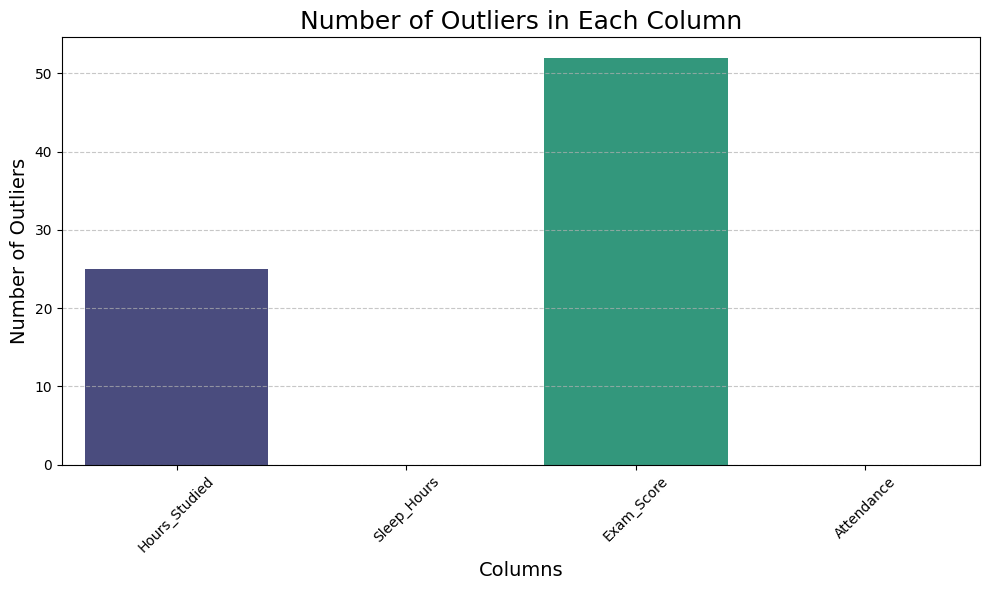

In [17]:
#detecting outliers for relevant columns using z score method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

columns_to_check = ['Hours_Studied', 'Sleep_Hours', 'Exam_Score','Attendance']  
outlier_counts = {}

for column in columns_to_check:
    outliers = detect_outliers_zscore(df[column])
    outlier_counts[column] = outliers.sum()  

plt.figure(figsize=(10, 6))
sns.barplot(x=list(outlier_counts.keys()), y=list(outlier_counts.values()), palette='viridis')
plt.title('Number of Outliers in Each Column', fontsize=18)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Number of Outliers', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# we choose not to remove outliers for this particular dataset as they show natural data variability in this context. However to showcase process of removal.
threshold = 3
df_cleaned_zscore = df[(np.abs(stats.zscore(df['Hours_Studied'].dropna())) <= threshold) | df['Hours_Studied'].isna()]
df_cleaned_zscore = df[(np.abs(stats.zscore(df['Exam_Score'].dropna())) <= threshold) | df['Exam_Score'].isna()]

print("Dataset after removing outliers using Z-score method:")

print(df_cleaned_zscore['Exam_Score'])
print(df_cleaned_zscore['Hours_Studied'])

Dataset after removing outliers using Z-score method:
0       67.0
1       61.0
2       74.0
3       71.0
4       70.0
        ... 
6602    68.0
6603    69.0
6604    68.0
6605    68.0
6606    64.0
Name: Exam_Score, Length: 6555, dtype: float64
0       23
1       19
2       24
3       29
4       19
        ..
6602    25
6603    23
6604    20
6605    10
6606    15
Name: Hours_Studied, Length: 6555, dtype: int64


In [ ]:
#Statiscal Analyis

In [22]:
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score', 'Tutoring_Sessions', 'Physical_Activity']
skewness = df[numerical_cols].skew()
kurtosis = df[numerical_cols].kurt()

print("\nSkewness for Numerical Columns:")
print(skewness)

print("\nKurtosis for Numerical Columns:")
print(kurtosis)


Skewness for Numerical Columns:
Hours_Studied        0.013499
Attendance           0.013666
Sleep_Hours         -0.023805
Previous_Scores     -0.003832
Exam_Score           1.644782
Tutoring_Sessions    0.816293
Physical_Activity   -0.031965
dtype: float64

Kurtosis for Numerical Columns:
Hours_Studied         0.017771
Attendance           -1.194407
Sleep_Hours          -0.503697
Previous_Scores      -1.191055
Exam_Score           10.575377
Tutoring_Sessions     0.646024
Physical_Activity    -0.057617
dtype: float64


In [ ]:
#UNIVARIANT ANALYSIS

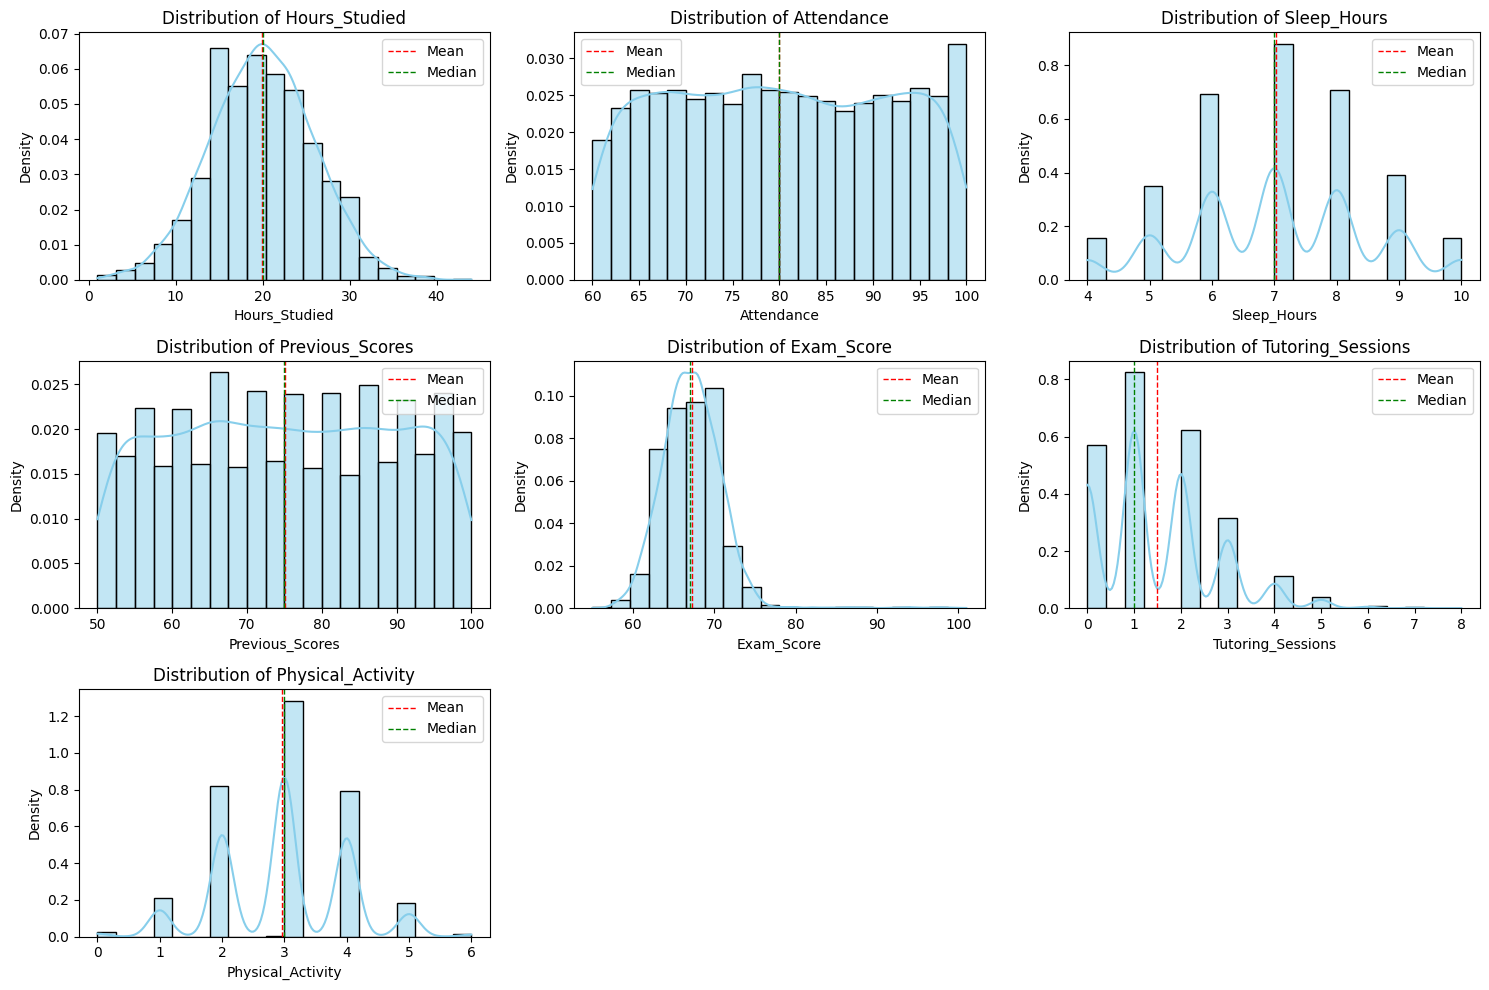

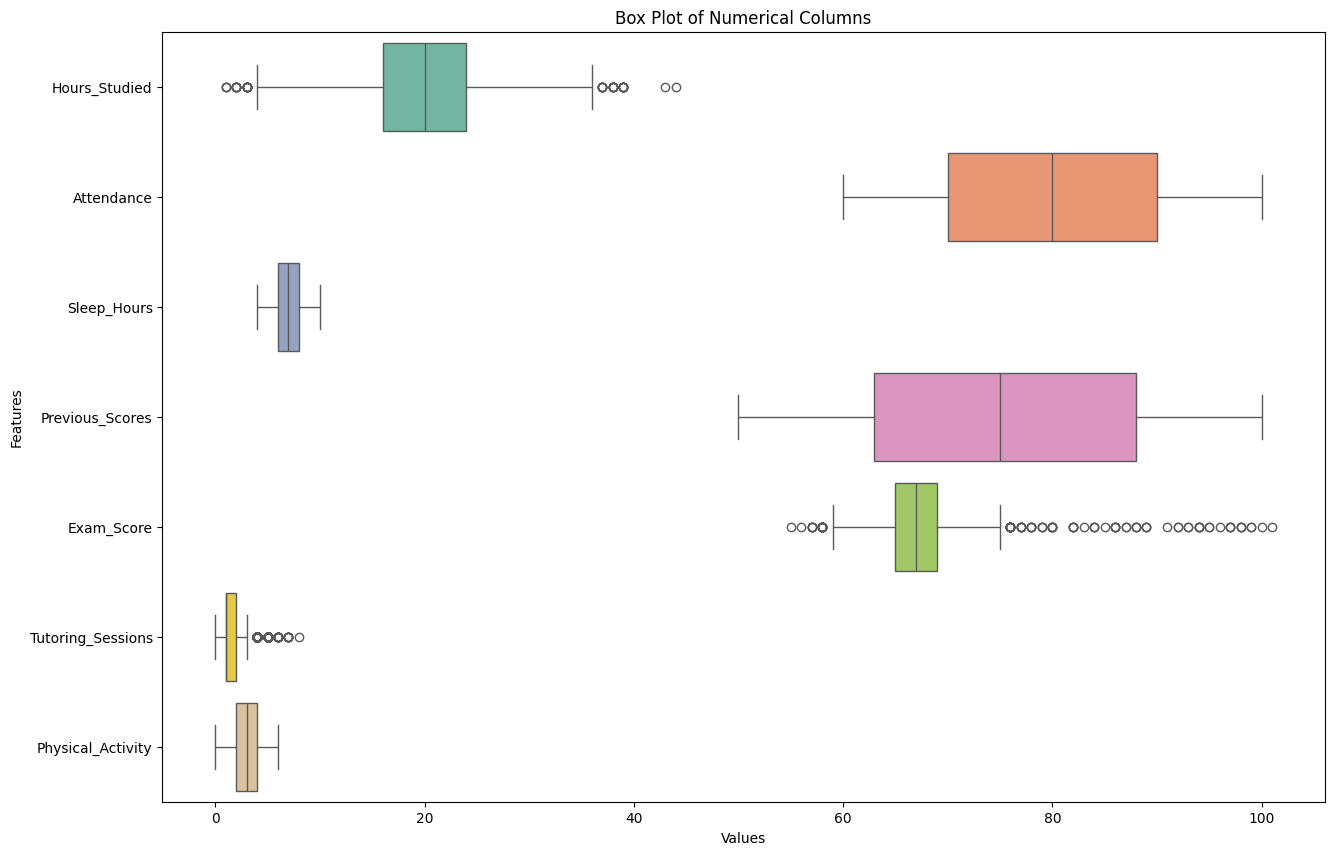

In [24]:
#FOR NUMERICAL COLUMNS 
# List of numerical columns
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score', 'Tutoring_Sessions', 'Physical_Activity']


plt.figure(figsize=(15, 10))

# Histogram and Density Plot to visualise the shape of data and skewness
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', stat='density')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1, label='Median')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

# Box Plot to see outliers in data
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_cols], orient='h', palette='Set2')
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

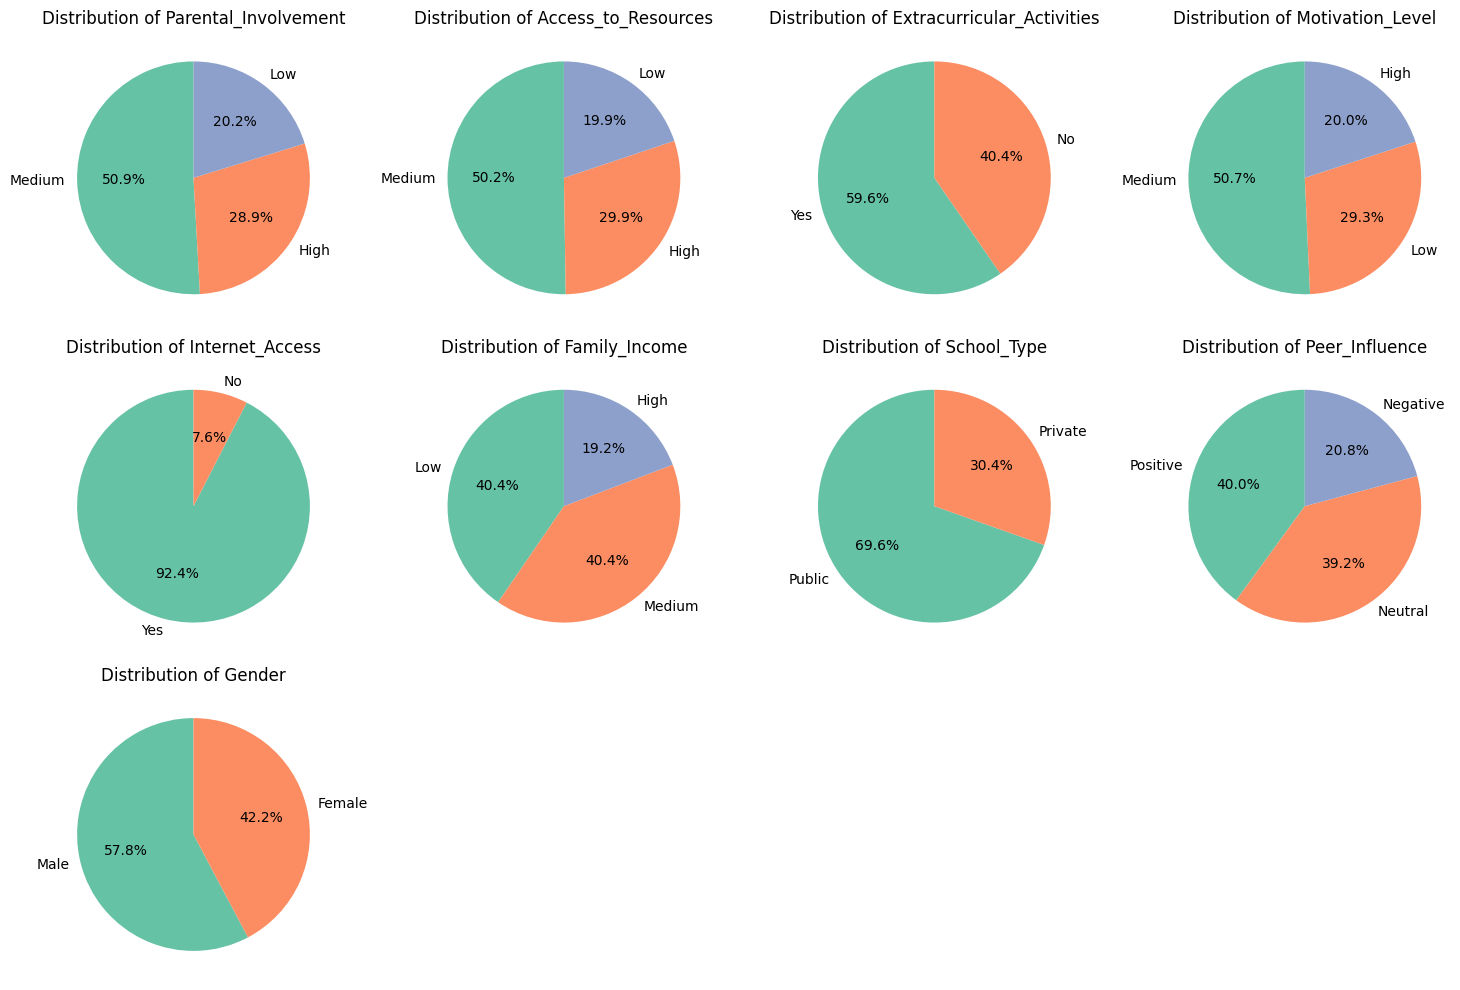

In [25]:
#FOR CATEGORICAL COLUMNS
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                    'Motivation_Level', 'Internet_Access', 'Family_Income', 
                    'School_Type', 'Peer_Influence', 'Gender']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 4, i + 1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
    plt.title(f'Distribution of {col}')
    plt.ylabel('')  # Hide y-label

plt.tight_layout()
plt.show()

In [30]:
# Statistical analysis
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score', 'Tutoring_Sessions', 'Physical_Activity']
for column in numerical_cols:
  column_np = df[column].dropna().to_numpy() 
  mean = np.mean(column_np)
  std_dev = np.std(column_np)
  median=np.median(column_np)

  # Print mean and standard deviation
  print(column)
  print(f"Mean: {mean}")
  print(f"Median: {median}")
  print(f"Standard Deviation: {std_dev}")
  print()



Hours_Studied
Mean: 19.975329196306948
Median: 20.0
Standard Deviation: 5.990140967346884

Attendance
Mean: 79.97744816104132
Median: 80.0
Standard Deviation: 11.546601046548995

Sleep_Hours
Mean: 7.029060087785682
Median: 7.0
Standard Deviation: 1.468009119146799

Previous_Scores
Mean: 75.07099606418407
Median: 75.0
Standard Deviation: 14.398645012000609

Exam_Score
Mean: 67.23569482288828
Median: 67.0
Standard Deviation: 3.890160270365497

Tutoring_Sessions
Mean: 1.4934140802422409
Median: 1.0
Standard Deviation: 1.230321937912272

Physical_Activity
Mean: 2.967448902346707
Median: 3.0
Standard Deviation: 1.0307811061595864



In [ ]:
#BIVARIANT ANALYSIS

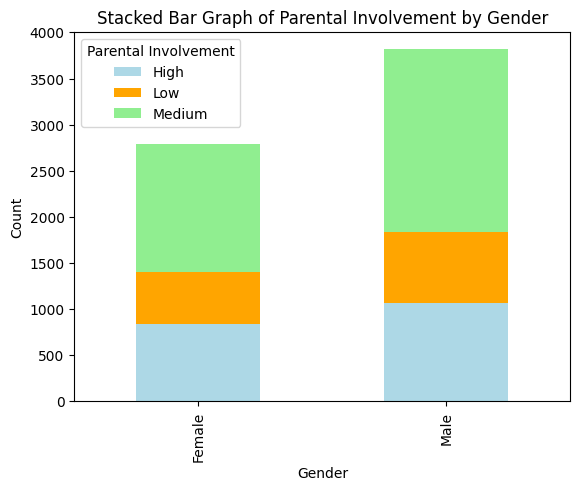

In [32]:
#Stacked bar graphs


cross_tab = pd.crosstab(df['Gender'], df['Parental_Involvement'])


cross_tab.plot(kind='bar', stacked=True, color=['lightblue', 'orange', 'lightgreen'])
plt.title('Stacked Bar Graph of Parental Involvement by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Parental Involvement')
plt.show()


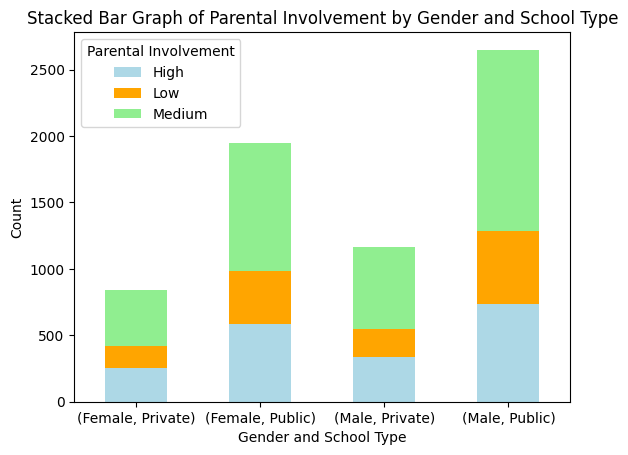

In [33]:

cross_tab = pd.crosstab(index=[df['Gender'], df['School_Type']], columns=df['Parental_Involvement'])

# Stacked Bar Graph
cross_tab.plot(kind='bar', stacked=True, color=['lightblue', 'orange', 'lightgreen'])
plt.title('Stacked Bar Graph of Parental Involvement by Gender and School Type')
plt.xlabel('Gender and School Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Parental Involvement')
plt.show()

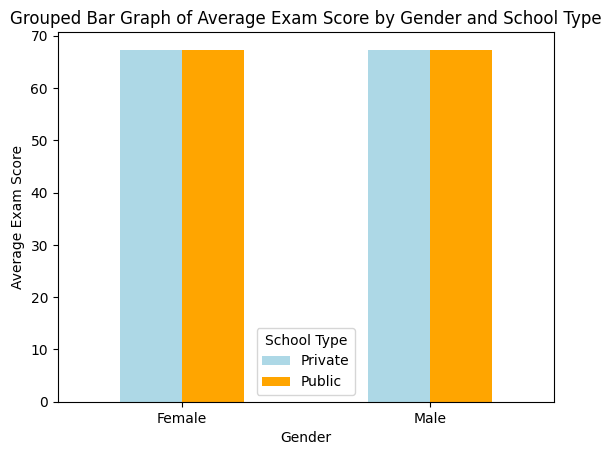

In [34]:
# Grouped Bar Graph
grouped_df = df.groupby(['Gender', 'School_Type'])['Exam_Score'].mean().unstack()


grouped_df.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Grouped Bar Graph of Average Exam Score by Gender and School Type')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.xticks(rotation=0)
plt.legend(title='School Type')
plt.show()

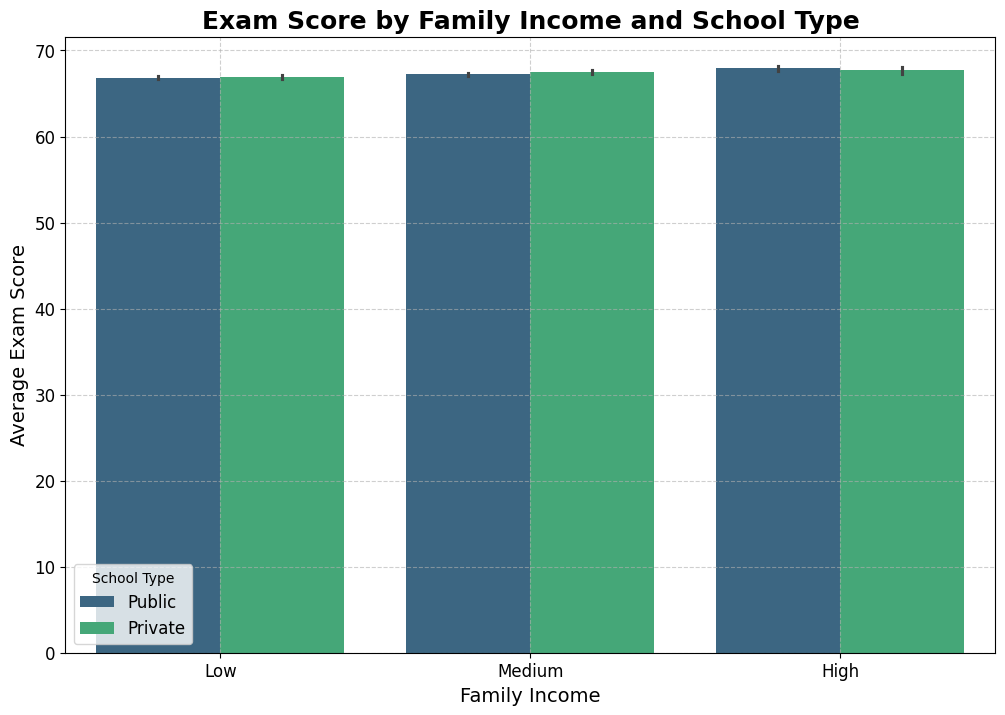

In [37]:
# Grouped Bar Chart: Exam Score by Family Income and School Type
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='Family_Income', y='Exam_Score', hue='School_Type', palette='viridis')

# Beautifying the plot
plt.title('Exam Score by Family Income and School Type', fontsize=18, fontweight='bold')
plt.xlabel('Family Income', fontsize=14)
plt.ylabel('Average Exam Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='School Type', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

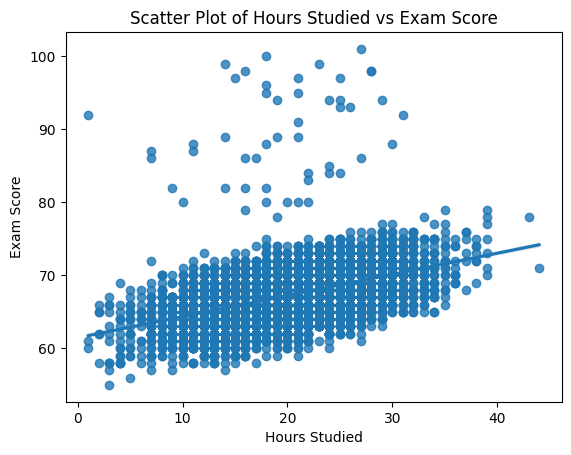

In [35]:

# Scatter plot with regression line
sns.regplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Scatter Plot of Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

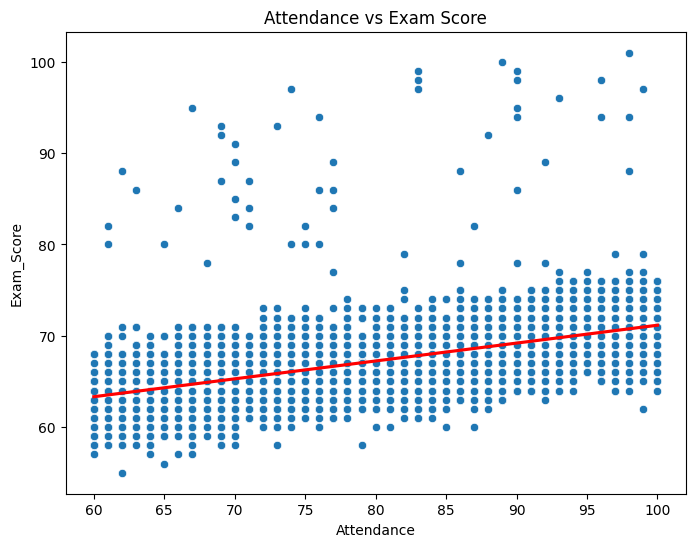

In [36]:
# Scatter plot: Attendance vs Exam_Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=df)
sns.regplot(x='Attendance', y='Exam_Score', data=df, scatter=False, color='red')  # Adding trendline
plt.title('Attendance vs Exam Score')
plt.show()


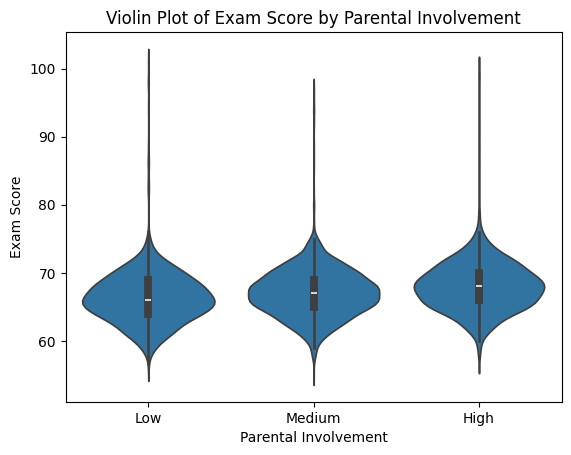

In [39]:
# Violin plot for Parental Involvement
sns.violinplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.title('Violin Plot of Exam Score by Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()

In [42]:
# Chi-Square Test for Independence between Gender and Access to resources and Parental_Involvement
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Gender'], df['Access_to_Resources'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:\n", contingency_table)
print()
print()
print()
print("Chi-square Statistic:", chi2)
print()
print("P-value:", p)
print()
print("Degrees of Freedom:", dof)
print()
print("Expected Frequencies:\n", expected)


alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Gender and Access to Resources.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Gender and Access to Resources.")

Contingency Table:
 Access_to_Resources  High  Low  Medium
Gender                                
Female                841  558    1392
Male                 1134  754    1928



Chi-square Statistic: 0.27289189606556796

P-value: 0.8724534768118846

Degrees of Freedom: 2

Expected Frequencies:
 [[ 834.30074164  554.2291509  1402.47010746]
 [1140.69925836  757.7708491  1917.52989254]]
Fail to reject the null hypothesis: There is no significant association between Gender and Access to Resources.


In [43]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Gender'], df['Parental_Involvement'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:\n", contingency_table)
print()
print()
print()
print("Chi-square Statistic:", chi2)
print()
print("P-value:", p)
print()
print("Degrees of Freedom:", dof)
print()
print("Expected Frequencies:\n", expected)


alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Gender and Access to Resources.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Gender and Access to Resources.")

Contingency Table:
 Parental_Involvement  High  Low  Medium
Gender                                 
Female                 842  563    1386
Male                  1066  774    1976



Chi-square Statistic: 4.221071799729179

P-value: 0.1211730124295623

Degrees of Freedom: 2

Expected Frequencies:
 [[ 805.99788104  564.78991978 1420.21219918]
 [1102.00211896  772.21008022 1941.78780082]]
Fail to reject the null hypothesis: There is no significant association between Gender and Access to Resources.


In [ ]:
#Data Tranformation

In [45]:
# 1. Standardizing Numerical Features
from sklearn.preprocessing import StandardScaler, OneHotEncoder
df_transformed = df.copy()


numerical_features = ['Hours_Studied', 'Sleep_Hours', 'Exam_Score']
scaler = StandardScaler()

df_transformed[numerical_features] = scaler.fit_transform(df_transformed[numerical_features])

In [46]:
df_transformed


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,0.504942,84,Low,High,No,-0.019796,73.0,Low,Yes,0.0,Low,Public,Positive,3.0,No,Male,-0.060587
1,-0.162822,64,Low,Medium,No,0.661399,59.0,Low,Yes,2.0,Medium,Public,Negative,4.0,No,Female,-1.602940
2,0.671882,98,Medium,Medium,Yes,-0.019796,91.0,Medium,Yes,2.0,Medium,Public,Neutral,4.0,No,Male,1.738824
3,1.506587,89,Low,Medium,Yes,0.661399,98.0,Medium,Yes,1.0,Medium,Public,Negative,4.0,No,Male,0.967648
4,-0.162822,92,Medium,Medium,Yes,-0.700990,65.0,Medium,Yes,3.0,Medium,Public,Neutral,4.0,No,Female,0.710589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838823,69,High,Medium,No,-0.019796,76.0,Medium,Yes,1.0,High,Public,Positive,2.0,No,Female,0.196471
6603,0.504942,76,High,Medium,No,0.661399,81.0,Medium,Yes,3.0,Low,Public,Positive,2.0,No,Female,0.453530
6604,0.004119,90,Medium,Low,Yes,-0.700990,65.0,Low,Yes,3.0,Low,Public,Negative,2.0,No,Female,0.196471
6605,-1.665291,86,High,High,Yes,-0.700990,91.0,High,Yes,2.0,Low,Private,Positive,3.0,No,Female,0.196471


In [53]:

#Encoding Categorical Variables
df_transformed = pd.get_dummies(df, columns=['Extracurricular_Activities'], drop_first=True)

In [54]:
df_transformed.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score,Extracurricular_Activities_Yes
0,23,84,Low,High,7,73.0,Low,Yes,0.0,Low,Public,Positive,3.0,No,Male,67.0,False
1,19,64,Low,Medium,8,59.0,Low,Yes,2.0,Medium,Public,Negative,4.0,No,Female,61.0,False
2,24,98,Medium,Medium,7,91.0,Medium,Yes,2.0,Medium,Public,Neutral,4.0,No,Male,74.0,True
3,29,89,Low,Medium,8,98.0,Medium,Yes,1.0,Medium,Public,Negative,4.0,No,Male,71.0,True
4,19,92,Medium,Medium,6,65.0,Medium,Yes,3.0,Medium,Public,Neutral,4.0,No,Female,70.0,True


In [56]:
#creating new feature
df_transformed['Study_Efficiency'] = df_transformed['Exam_Score'] / df_transformed['Hours_Studied']

print("Original DataFrame:")
print(df)
print("\nTransformed DataFrame:")
print(df_transformed)

Original DataFrame:
      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0 